In [1]:
import pandas as pd
df =pd.read_csv("news.csv")
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [3]:
x=df['text'].values
y=df['label'].values

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [6]:
x_train.shape

(4751,)

In [7]:
x_test.shape

(1584,)

In [40]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:>

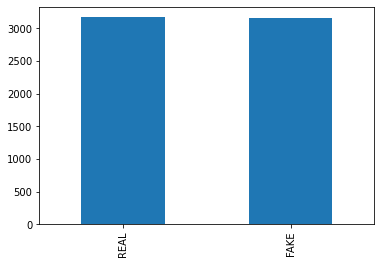

In [41]:
df['label'].value_counts().plot(kind='bar')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(stop_words='english')
x_train_vector=vector.fit_transform(x_train)
x_test_vector=vector.transform(x_test)

In [9]:
print(x_train_vector)

  (0, 34326)	4
  (0, 39591)	14
  (0, 15881)	1
  (0, 47758)	2
  (0, 24641)	1
  (0, 51626)	2
  (0, 38694)	2
  (0, 47467)	1
  (0, 16833)	2
  (0, 662)	2
  (0, 41543)	2
  (0, 42906)	1
  (0, 24570)	1
  (0, 31942)	1
  (0, 39874)	1
  (0, 51661)	1
  (0, 30961)	1
  (0, 42688)	1
  (0, 37422)	1
  (0, 56307)	1
  (0, 9086)	3
  (0, 12226)	3
  (0, 10093)	1
  (0, 23096)	1
  (0, 43536)	1
  :	:
  (4750, 39239)	1
  (4750, 33332)	1
  (4750, 36050)	1
  (4750, 41404)	1
  (4750, 56527)	1
  (4750, 48202)	1
  (4750, 14871)	1
  (4750, 36049)	1
  (4750, 18343)	1
  (4750, 30986)	1
  (4750, 8021)	1
  (4750, 42728)	1
  (4750, 11027)	1
  (4750, 18656)	1
  (4750, 11840)	1
  (4750, 20154)	1
  (4750, 20745)	1
  (4750, 21909)	1
  (4750, 22863)	2
  (4750, 55364)	1
  (4750, 41366)	1
  (4750, 56938)	2
  (4750, 27242)	1
  (4750, 31989)	1
  (4750, 13739)	1


In [10]:
#SVM MODEL 1
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train_vector,y_train)

SVC()

In [11]:
y_pred_svm=model_svm.predict(x_test_vector)
print(y_pred_svm)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [12]:
print(y_test)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_svm,y_test)

0.8642676767676768

In [14]:
#SVM WITH COUNTVECTORIZER PIPELINE      MODEL 2

In [15]:
from sklearn.pipeline import make_pipeline
model_svm_pipeline=make_pipeline(CountVectorizer(),SVC())
model_svm_pipeline.fit(x_train,y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [16]:
y_pred_pipeline=model_svm_pipeline.predict(x_test)
print(y_pred_pipeline)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [18]:
print(y_test)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_pipeline,y_test)

0.8383838383838383

In [20]:
#NAIVE BAYES        MODEL 3

In [21]:
from sklearn.naive_bayes import MultinomialNB
model_naive=MultinomialNB()
model_naive.fit(x_train_vector,y_train)

MultinomialNB()

In [22]:
y_pred_naive=model_naive.predict(x_test_vector)
print(y_pred_naive)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [23]:
print(y_test)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_naive,y_test)

0.8819444444444444

In [25]:
#MNB PIPELINE       MODEL 4

In [26]:
from sklearn.pipeline import make_pipeline
model_MNB_pipeline=make_pipeline(CountVectorizer(),MultinomialNB())
model_MNB_pipeline.fit(x_train,y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
y_pred_pipeline2=model_MNB_pipeline.predict(x_test)
print(y_pred_pipeline2)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [28]:
print(y_test)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_pipeline2,y_test)

0.8781565656565656

In [30]:
# ACCURACY SCORES
# SVM             0.8642676767676768
# SVC_PIPELINE    0.8383838383838383
# NAIVE           0.8819444444444444
# MNB PIPELINE    0.8781565656565656


In [31]:
#as we can see that the MODEL 3 has the best accuarcy score of 88.194%
#so it will be used for further process

In [32]:
#serialisation using JOBLIB
import joblib
joblib.dump(model_naive,'Real-Fake')

['Real-Fake']

In [33]:
import joblib
text_model=joblib.load('Real-Fake')

In [34]:
print(x_test.ndim)

1


In [36]:
text_model.predict(['save 100 '])


ValueError: Expected 2D array, got 1D array instead:
array=['save 100 '].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
import joblib
joblib.dump(model_MNB_pipeline,'r-f')

['r-f']

In [38]:
import joblib
model_2=joblib.load('r-f')

In [39]:
model_2.predict(["save 1000"])

array(['FAKE'], dtype='<U4')